# Problem statement:
In this data set we are going to predict the Outcome based on the independent variables like Glucose,Bloodpressure,skinthickness,insulin,BMI,Diabetespedigreefunction,Age 

### 1.Importing the Packaages
### 2.Data Analysing
### 3.Applying the Various Algorithms

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
print("no of persons in original data:"+str(len(df.index)))

no of persons in original data:768


In [5]:
df.shape

(768, 9)

In [6]:
df.size

6912

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


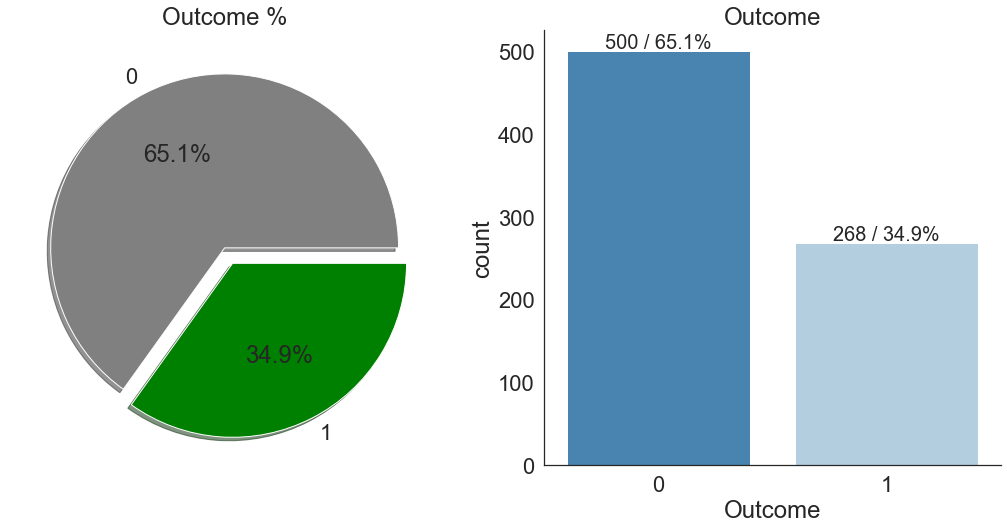

In [10]:
total_cnt = df['Outcome'].count()
sns.set(font_scale = 2)
sns.set_style("white")
sns.set_palette("bright")
f, ax = plt.subplots(1, 2, figsize = (18, 8))
df['Outcome'].value_counts().plot.pie(explode = [0, 0.1], 
                                               autopct = '%1.1f%%', 
                                               ax = ax[0],
                                               shadow = True,
                                               colors = ['grey', 'green'])
ax[0].set_title('Outcome %')
ax[0].set_ylabel('')
sns.countplot('Outcome', data = df, ax = ax[1], palette='Blues_r')
ax[1].set_title('Outcome')
for p in ax[1].patches:
    x, height, width = p.get_x(), p.get_height(), p.get_width()
    ax[1].text(x + width / 2, height + 10, f'{height} / {height / total_cnt * 100:2.1f}%', va='center', ha='center', size=20)
sns.despine()

<AxesSubplot:xlabel='Outcome', ylabel='count'>

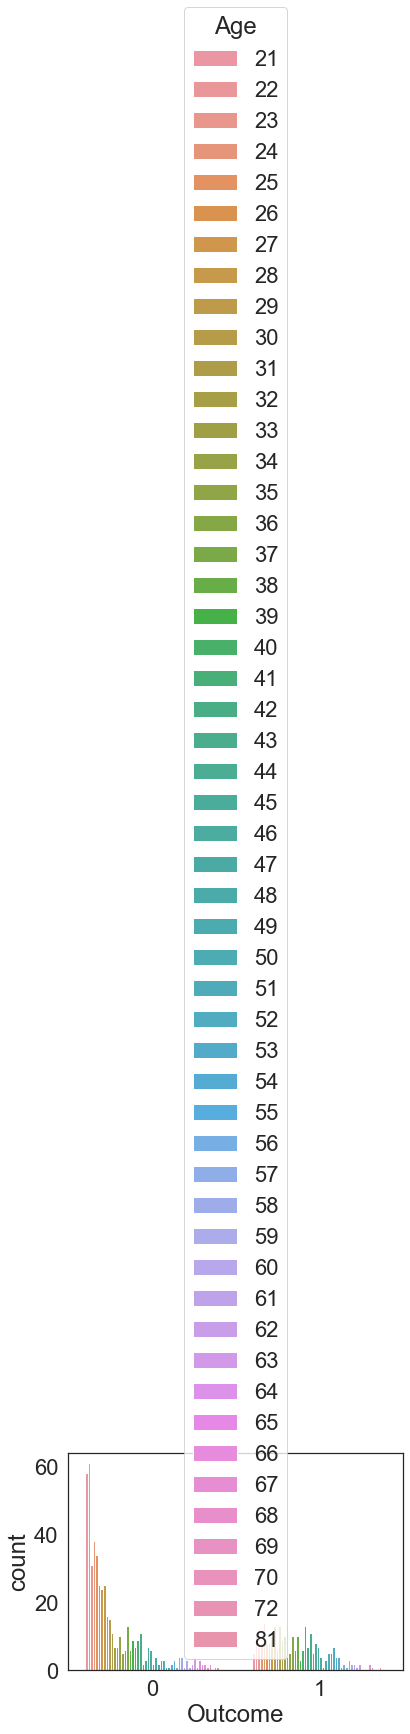

In [11]:
sns.countplot(x="Outcome",hue="Age", data=df)

<AxesSubplot:ylabel='Frequency'>

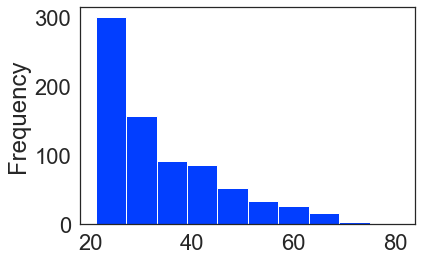

In [12]:
df["Age"].plot.hist()

<AxesSubplot:xlabel='Outcome', ylabel='count'>

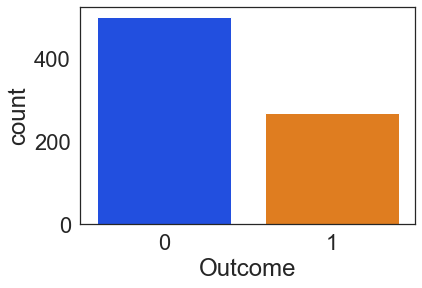

In [13]:
sns.countplot(x="Outcome", data=df)

In [14]:
df.corr()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<AxesSubplot:>

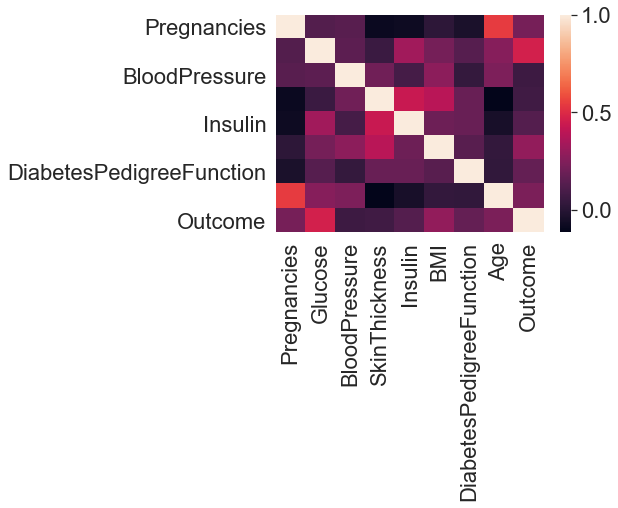

In [15]:
sns.heatmap(df.corr())

In [16]:
X= df.drop('Outcome',axis=1)
y= df.Outcome

In [17]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [18]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=225)

In [21]:
len(X_train),len(y_train)

(514, 514)

In [22]:
len(X_test),len(y_test)

(254, 254)

In [23]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
636,5,104,74,0,0,28.8,0.153,48
209,7,184,84,33,0,35.5,0.355,41
749,6,162,62,0,0,24.3,0.178,50
637,2,94,76,18,66,31.6,0.649,23
378,4,156,75,0,0,48.3,0.238,32
...,...,...,...,...,...,...,...,...
255,1,113,64,35,0,33.6,0.543,21
174,2,75,64,24,55,29.7,0.370,33
498,7,195,70,33,145,25.1,0.163,55
288,4,96,56,17,49,20.8,0.340,26


In [24]:
y_train

636    0
209    1
749    1
637    0
378    1
      ..
255    1
174    0
498    1
288    0
675    1
Name: Outcome, Length: 514, dtype: int64

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [26]:
model = LogisticRegression()
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
accuracy_score(y_test,y_predict)

0.8031496062992126

In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Accuracy : ", accuracy_score(y_test,y_predict))
print("Precision : ", precision_score(y_test,y_predict))
print("Recall : ", recall_score(y_test,y_predict))

Accuracy :  0.8031496062992126
Precision :  0.8181818181818182
Recall :  0.5869565217391305


In [28]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
accuracy_score(y_test,y_predict)

0.7362204724409449

In [29]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
accuracy_score(y_test,y_predict)

0.7874015748031497

In [30]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
accuracy_score(y_test,y_predict)

0.8070866141732284

In [31]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
accuracy_score(y_test,y_predict)

0.7086614173228346

In [32]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 5, random_state = 1)
rf.fit(X_train,y_train)
print("Random Forest accuracy for 5 trees is :",rf.score(X_test,y_test))

Random Forest accuracy for 5 trees is : 0.7440944881889764


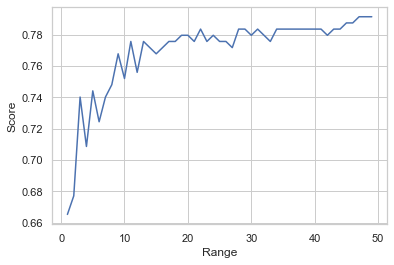

In [33]:
sns.set(style="whitegrid")
score_array = []
for each in range(1,50):
    rf_loop = RandomForestClassifier(n_estimators = each, random_state = 1) #set K neighbor as 3
    rf_loop.fit(X_train,y_train)
    score_array.append(rf_loop.score(X_test,y_test))
    
plt.plot(range(1,50),score_array)
plt.xlabel("Range")
plt.ylabel("Score")
plt.show()

In [34]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 33, random_state = 1)
rf.fit(X_train,y_train)
print("Random Forest accuracy for 30 trees is :",rf.score(X_test,y_test))

Random Forest accuracy for 30 trees is : 0.7755905511811023


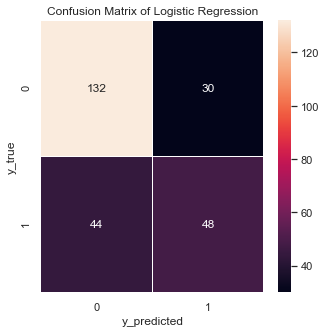

In [35]:
cm_lr = confusion_matrix(y_test,y_predict)

# confusion matrix visualization

f, ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm_lr, annot = True, linewidths = 0.5, color = "red", fmt = ".0f", ax=ax)
plt.xlabel("y_predicted")
plt.ylabel("y_true")
plt.title("Confusion Matrix of Logistic Regression")
plt.show()

In [36]:
report = classification_report(y_test, y_predict)
print(report)

              precision    recall  f1-score   support

           0       0.75      0.81      0.78       162
           1       0.62      0.52      0.56        92

    accuracy                           0.71       254
   macro avg       0.68      0.67      0.67       254
weighted avg       0.70      0.71      0.70       254



In [37]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,roc_auc_score
auc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
auc

0.6682769726247988

ROC-AUC_SCORE 0.6682769726247988


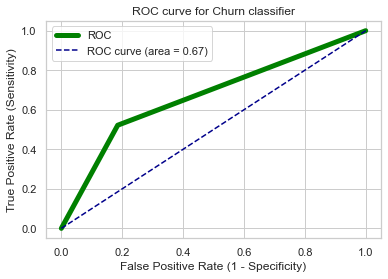

In [38]:
from sklearn.metrics import roc_curve,roc_auc_score

y_predict = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test,y_predict)
plt.title('ROC curve for Churn classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.plot(fpr, tpr,color='green',lw=5,label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.legend()
print("ROC-AUC_SCORE",roc_auc_score(y_test,y_predict))
plt.show()

In [39]:
model.predict([[5,104,74,0,0,28.8,0.153,48]])

array([0], dtype=int64)

In [40]:
model.predict([[7,184,84,33,0,35.5,0.355,41]])

array([1], dtype=int64)

In [41]:
model.predict([[7,8,25,22,36,25.2,52,85]])

array([0], dtype=int64)